In [1]:
from metrics import PerSNMetric
from efficiencyTable import EfficiencyTable

In [2]:
from opsimsummary import summarize_opsim as oss

In [3]:
import pandas as pd
import sncosmo

In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt
import os
import numpy as np
import copy

In [5]:
from lsst.sims.photUtils import BandpassDict

## Setup : Bandpasses

In [6]:
# Catsim bandpasses
lsst_bp = BandpassDict.loadTotalBandpassesFromFiles()

In [7]:
# sncosmo Bandpasses required for fitting
throughputsdir = os.getenv('THROUGHPUTS_DIR')

from astropy.units import Unit
bandPassList = ['u', 'g', 'r', 'i', 'z', 'y']
banddir = os.path.join(os.getenv('THROUGHPUTS_DIR'), 'baseline')

for band in bandPassList:

    # setup sncosmo bandpasses
    bandfname = banddir + "/total_" + band + '.dat'


    # register the LSST bands to the SNCosmo registry
    # Not needed for LSST, but useful to compare independent codes
    # Usually the next two lines can be merged,
    # but there is an astropy bug currently which affects only OSX.
    numpyband = np.loadtxt(bandfname)
    print band
    sncosmoband = sncosmo.Bandpass(wave=numpyband[:, 0],
                                   trans=numpyband[:, 1],
                                   wave_unit=Unit('nm'),
                                   name=band)
    sncosmo.registry.register(sncosmoband, force=True)

u
g
r
i
z
y


In [8]:
et = EfficiencyTable.fromDES_EfficiencyFile('example_data/SEARCHEFF_PIPELINE_DES.DAT')

In [10]:
from lsst.sims.catUtils.supernovae import SNObject

In [11]:
opsimHDF = os.path.join(os.getenv('HOME'), 'data', 'LSST', 'OpSimData', 'storage.h5')
summarydf = pd.read_hdf(opsimHDF, 'table')
# df = df.query('propID == [364, 366]')

In [12]:
summarydf.head()

,obsHistID,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,wind,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec,gamma,N0sq,alpha
0,1,1189,364,316,1.676483,-1.082473,y,2771,49353.032079,0,...,0.0,0.0,1.620307,0.000000,21.084291,1.643930,-1.108924,0.039924,0.000002,0.039924
1,2,1189,364,372,1.694120,-1.033972,y,2810,49353.032525,0,...,0.0,0.0,0.049266,4.542362,21.088257,1.664257,-1.060423,0.039924,0.000002,0.039924
2,3,1189,364,441,1.708513,-0.985271,y,2848,49353.032971,0,...,0.0,0.0,0.049298,4.561422,21.091100,1.680878,-1.011722,0.039924,0.000002,0.039924
3,4,1189,364,505,1.720374,-0.936476,y,2887,49353.033417,0,...,0.0,0.0,0.049266,4.570186,21.092714,1.694604,-0.962927,0.039924,0.000002,0.039924
4,5,1189,364,587,1.730248,-0.887672,y,2925,49353.033864,0,...,0.0,0.0,0.049177,4.568530,21.093091,1.706054,-0.914123,0.039924,0.000002,0.039924


In [13]:
summarydf = summarydf.query('propID == [364, 366]')#.query('night < 365')

In [14]:
# Create the summary instance
so = oss.SummaryOpsim(summarydf)

In [15]:
ss = so.simlib(fieldID=309)

In [16]:
ss.head()

,obsHistID,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec,gamma,N0sq,alpha,MJDay
54984,54932,1189,364,309,4.189756,-1.082474,u,6337289,49426.348262,73,...,0.0,0.054175,4.737670,23.535869,4.165341,-1.089087,0.039553,7.762496e-07,0.039553,49426
62174,62118,1189,364,309,4.189756,-1.082474,i,7018234,49434.229565,81,...,0.0,0.054641,4.659288,23.346593,4.230447,-1.089087,0.039780,8.518120e-07,0.039780,49434
62201,62145,1189,364,309,4.189756,-1.082474,i,7019269,49434.241549,81,...,0.0,0.054641,4.600334,23.504851,4.230447,-1.089087,0.039745,7.912518e-07,0.039745,49434
65712,65656,1189,364,309,4.189756,-1.082474,Y,7364902,49438.241925,85,...,0.0,0.054641,4.534727,21.193041,4.136860,-1.085780,0.039916,2.304308e-06,0.039916,49438
65717,65661,1189,364,309,4.189756,-1.082474,Y,7365094,49438.244152,85,...,0.0,0.088075,5.189096,21.203663,4.136860,-1.085780,0.039915,2.293016e-06,0.039915,49438


##  Start the calculatios

#### Field in the 2nd Season

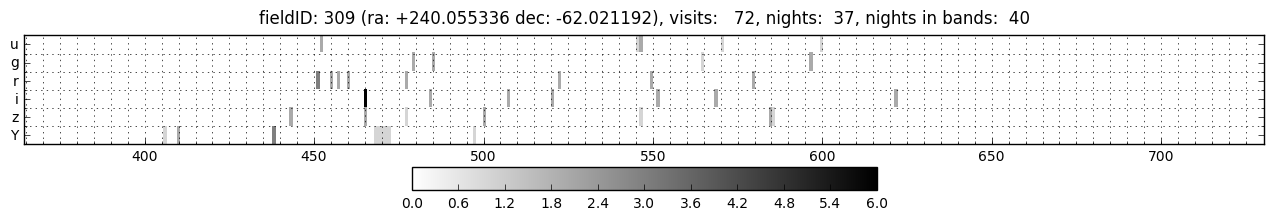

In [17]:
fig_309, mat, _, _, _ = so.cadence_plot(fieldID=309, nightMax=730, nightMin=365., sql_query='night < 730. and night > 365.')

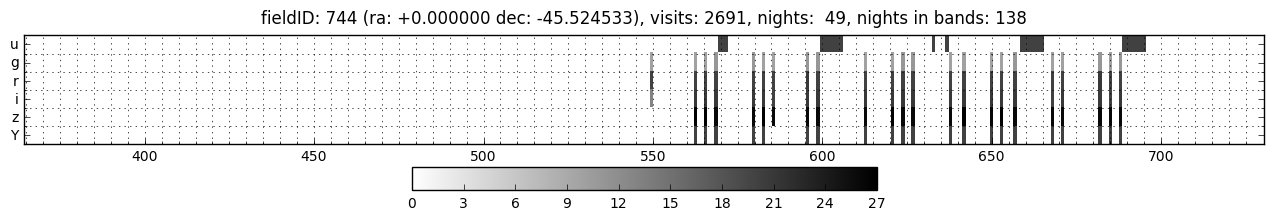

In [18]:
fig_744, mat, _, _, _ = so.cadence_plot(fieldID=744, nightMax=730, nightMin=365., sql_query='night < 730. and night > 365.')

In [19]:
fig_309.savefig('fig_309_2ndYear.pdf')
fig_744.savefig('fig_744_2ndYear.pdf')

####  Time Window around a central value

In [20]:
so.mjdvalfornight(570)

49923

#####  Deep field

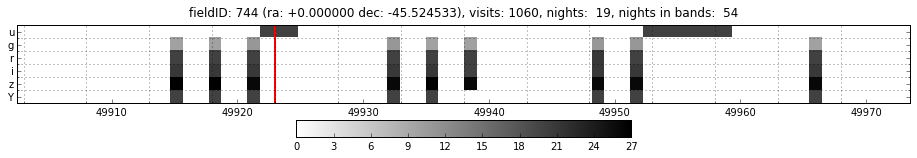

In [66]:
fig_744_49923, _, _, _, _ = so.cadence_plot(fieldID=744, mjd_center=49923, 
                                            mjd_range=[-20., 50.])

##### Main Field at 2 times

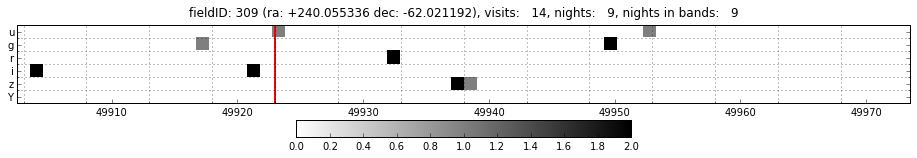

In [68]:
fig_309_49923, _, _, _, _ = so.cadence_plot(fieldID=309, mjd_center=49923, 
                                            mjd_range=[-20., 50.])

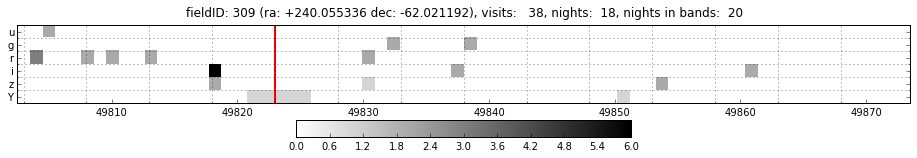

In [146]:
fig_309_49823, _, _, _, _ = so.cadence_plot(fieldID=309, mjd_center=49823, 
                                            mjd_range=[-20., 50.])

In [145]:
fig_744_49923.savefig('TimeWindow_744_49923.pdf')

In [ ]:
fig_309_49923.savefig('TimeWindow_309_49923.pdf')

In [148]:
fig_309_49823.savefig('TimeWindow_309_49823.pdf')

#####  Light Curves

In [21]:
qm_744_499 = PerSNMetric(t0=49923, fieldID=744, summarydf=summarydf,  efficiency=et, 
                         lsst_bp=lsst_bp)

In [22]:
qm_309_499 = PerSNMetric(t0=49923, fieldID=309, summarydf=summarydf,  efficiency=et, 
                         lsst_bp=lsst_bp)

In [209]:
qm_309_498 = PerSNMetric(t0=49823, fieldID=309, summarydf=summarydf,  efficiency=et, 
                         lsst_bp=lsst_bp)

(1103, Index([        u'obsHistID',         u'sessionID',            u'propID',
                 u'fieldID',           u'fieldRA',          u'fieldDec',
                  u'filter',           u'expDate',            u'expMJD',
                   u'night',         u'visitTime',      u'visitExpTime',
                 u'finRank',         u'finSeeing',      u'transparency',
                 u'airmass',        u'vSkyBright', u'filtSkyBrightness',
               u'rotSkyPos',               u'lst',          u'altitude',
                 u'azimuth',         u'dist2Moon',        u'solarElong',
                  u'moonRA',           u'moonDec',           u'moonAlt',
                  u'moonAZ',         u'moonPhase',            u'sunAlt',
                   u'sunAz',        u'phaseAngle',          u'rScatter',
              u'mieScatter',         u'moonIllum',        u'moonBright',
              u'darkBright',         u'rawSeeing',              u'wind',
                u'humidity',          u'slew

metrics.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['SNR'] = df['flux'] / df['fluxerr']
metrics.py:164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['DetectionEfficiency'] = df.apply(self.func, axis=1)
metrics.py:165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.sort_values('SNR', ascending=False, inplace=True)
metrics.py:102: SettingWithCopyWarning: 
A

(20, Index([        u'obsHistID',         u'sessionID',            u'propID',
                 u'fieldID',           u'fieldRA',          u'fieldDec',
                  u'filter',           u'expDate',            u'expMJD',
                   u'night',         u'visitTime',      u'visitExpTime',
                 u'finRank',         u'finSeeing',      u'transparency',
                 u'airmass',        u'vSkyBright', u'filtSkyBrightness',
               u'rotSkyPos',               u'lst',          u'altitude',
                 u'azimuth',         u'dist2Moon',        u'solarElong',
                  u'moonRA',           u'moonDec',           u'moonAlt',
                  u'moonAZ',         u'moonPhase',            u'sunAlt',
                   u'sunAz',        u'phaseAngle',          u'rScatter',
              u'mieScatter',         u'moonIllum',        u'moonBright',
              u'darkBright',         u'rawSeeing',              u'wind',
                u'humidity',          u'slewDi

NameError: name 'qm_309_498' is not defined

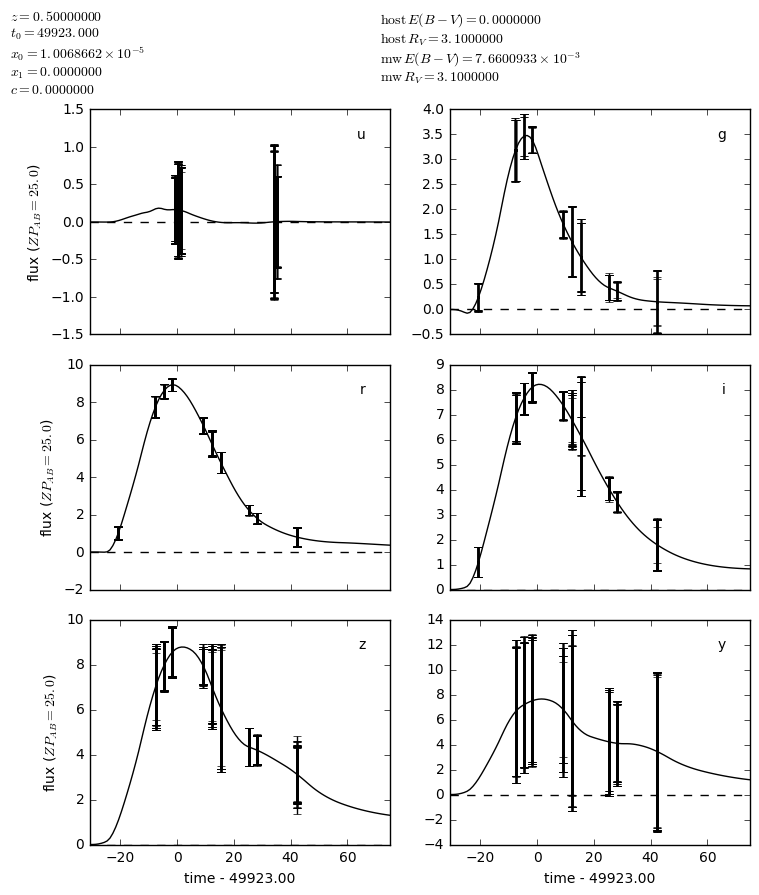

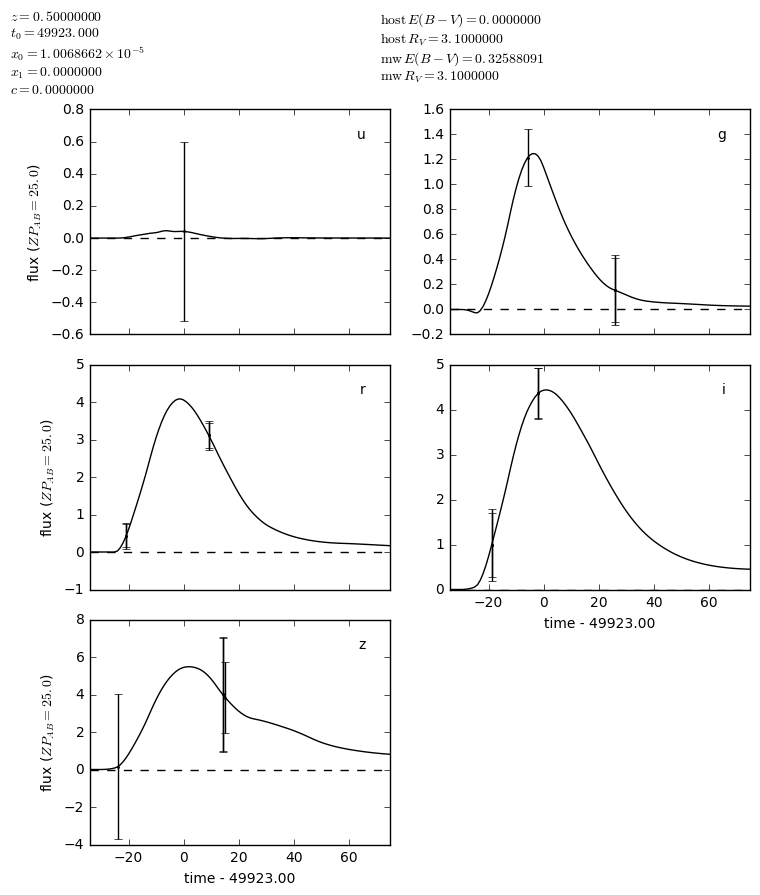

In [23]:
fig_744_499_lc = qm_744_499.lcplot()
fig_309_499_lc = qm_309_499.lcplot()
fig_309_498_lc = qm_309_498.lcplot()

# save to files
fig_744_499_lc.savefig('fig_744_49923_lc.pdf')
fig_309_499_lc.savefig('fig_309_49923_lc.pdf')
fig_309_498_lc.savefig('fig_309_49823_lc.pdf')

In [213]:
mcmc_out_309_744_Nocov = sncosmo.mcmc_lc(qm_744_499.SNCosmoLC(nightlyCoadd=True), model=qm_744.sncosmoModel, 
                vparam_names=['t0', 'x0', 'x1', 'c'], 
                bounds={'c':(-1., 1.), 'x1':(-5.0, 5.0)}, 
                minsnr=0., modelcov=False)
mcmc_out_309_499_Nocov = sncosmo.mcmc_lc(qm_309_499.SNCosmoLC(nightlyCoadd=True), model=qm_744.sncosmoModel, 
                vparam_names=['t0', 'x0', 'x1', 'c'], 
                bounds={'c':(-1., 1.), 'x1':(-5.0, 5.0)}, 
                minsnr=0., modelcov=False)
mcmc_out_309_498_Nocov = sncosmo.mcmc_lc(qm_309_498.SNCosmoLC(nightlyCoadd=True), model=qm_744.sncosmoModel, 
                vparam_names=['t0', 'x0', 'x1', 'c'], 
                bounds={'c':(-1., 1.), 'x1':(-5.0, 5.0)}, 
                minsnr=0., modelcov=False)

1103
20
40


In [27]:
qm_309_499.writeLightCurve('lc_field309_mjd_49923.ascii')

(20, Index([        u'obsHistID',         u'sessionID',            u'propID',
                 u'fieldID',           u'fieldRA',          u'fieldDec',
                  u'filter',           u'expDate',            u'expMJD',
                   u'night',         u'visitTime',      u'visitExpTime',
                 u'finRank',         u'finSeeing',      u'transparency',
                 u'airmass',        u'vSkyBright', u'filtSkyBrightness',
               u'rotSkyPos',               u'lst',          u'altitude',
                 u'azimuth',         u'dist2Moon',        u'solarElong',
                  u'moonRA',           u'moonDec',           u'moonAlt',
                  u'moonAZ',         u'moonPhase',            u'sunAlt',
                   u'sunAz',        u'phaseAngle',          u'rScatter',
              u'mieScatter',         u'moonIllum',        u'moonBright',
              u'darkBright',         u'rawSeeing',              u'wind',
                u'humidity',          u'slewDi

In [26]:
qm_744_499.writeLightCurve('lc_field744_mjd_49923.ascii')

(1103, Index([        u'obsHistID',         u'sessionID',            u'propID',
                 u'fieldID',           u'fieldRA',          u'fieldDec',
                  u'filter',           u'expDate',            u'expMJD',
                   u'night',         u'visitTime',      u'visitExpTime',
                 u'finRank',         u'finSeeing',      u'transparency',
                 u'airmass',        u'vSkyBright', u'filtSkyBrightness',
               u'rotSkyPos',               u'lst',          u'altitude',
                 u'azimuth',         u'dist2Moon',        u'solarElong',
                  u'moonRA',           u'moonDec',           u'moonAlt',
                  u'moonAZ',         u'moonPhase',            u'sunAlt',
                   u'sunAz',        u'phaseAngle',          u'rScatter',
              u'mieScatter',         u'moonIllum',        u'moonBright',
              u'darkBright',         u'rawSeeing',              u'wind',
                u'humidity',          u'slew

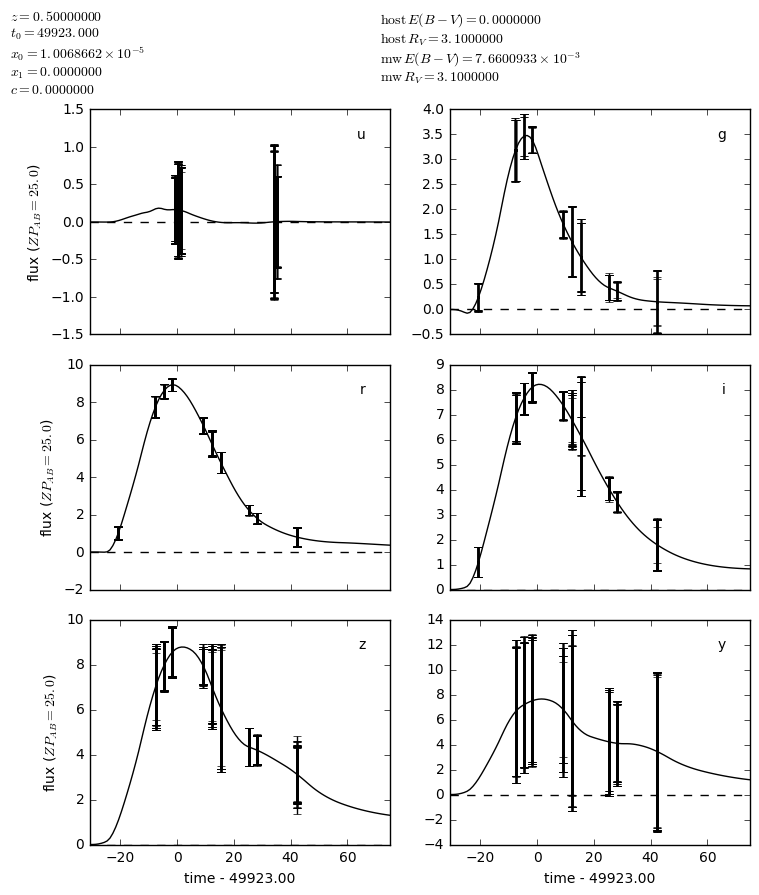

In [24]:
fig_744_499_lc

In [214]:
res_309_498_NoCov = ans.ResChar.fromSNCosmoRes(mcmc_out_309_498_Nocov)

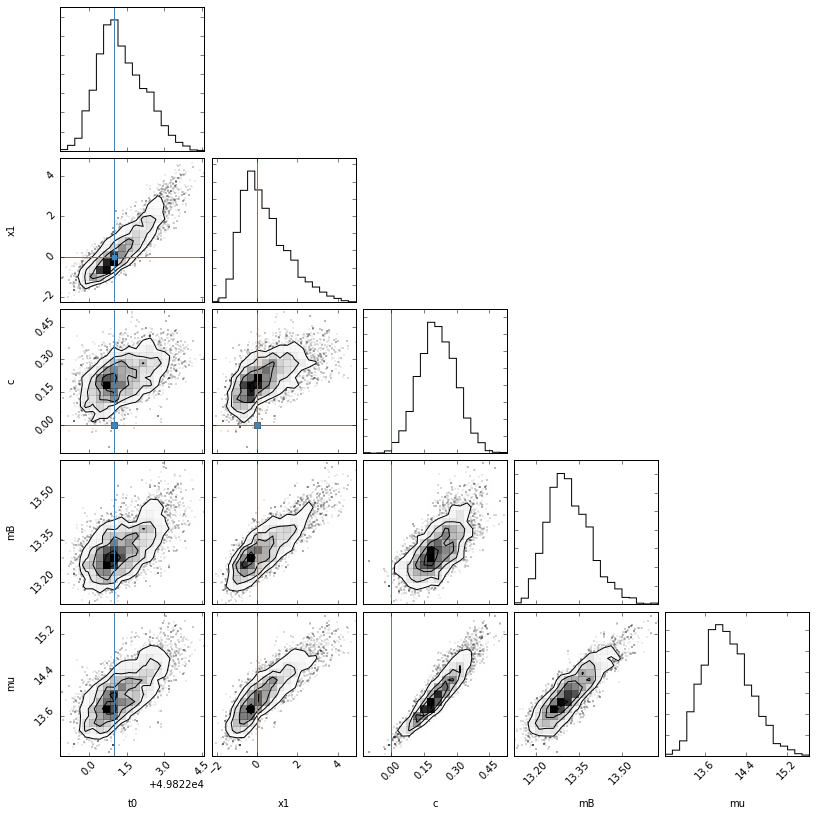

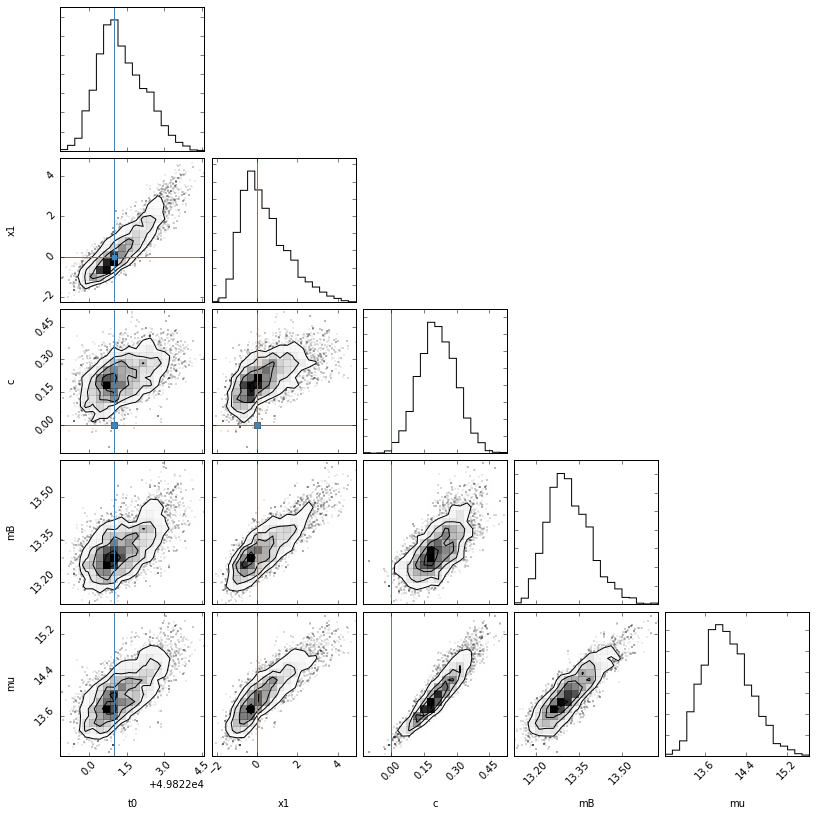

In [218]:
corner(res_309_498_NoCov.salt_samples(), labels=res_309_498_NoCov.salt_samples().columns, 
       truths=[49823., 0., 0., -12.5, -12.5])

In [ ]:
res_744_499_NoCov = ans.ResCharrChar.fromSN

In [ ]:
mcmc_out_309_498 = sncosmo.mcmc_lc(qm_309_498.SNCosmoLC(nightlyCoadd=True), model=qm_744.sncosmoModel, 
                vparam_names=['t0', 'x0', 'x1', 'c'], 
                bounds={'c':(-1., 1.), 'x1':(-5.0, 5.0)}, 
                minsnr=0., modelcov=True)

In [193]:
qm_309_498 = PerSNMetric(t0=49823, fieldID=309, summarydf=summarydf,  efficiency=et, 
                         lsst_bp=lsst_bp)

40


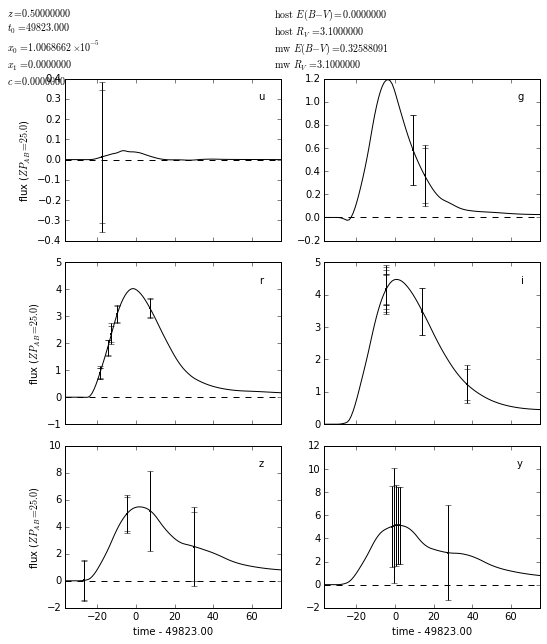

In [198]:
fig_qm_309_498 = qm_309_498.lcplot()

1103


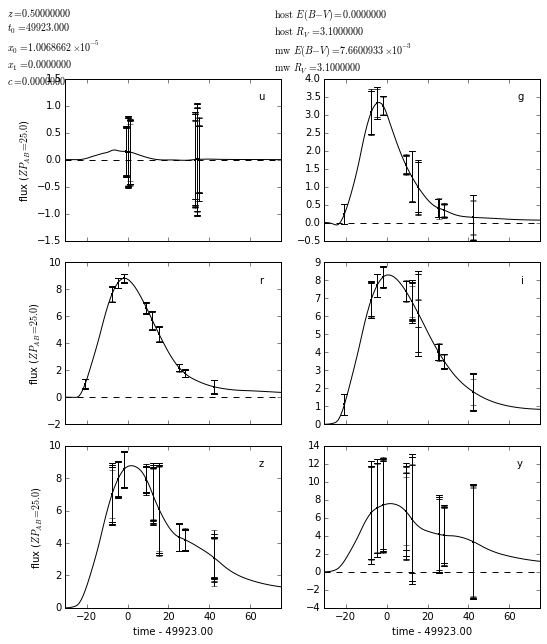

In [206]:
fig_744_499 = qm_744_499.lcplot(nightlyCoadd=False)

In [183]:
qm_309_498.SN.SNstate

{'MWE(B-V)': 0.32588091492652893,
 'ModelSource': 'salt2-extended',
 '_dec': -1.0824739999999999,
 '_ra': 4.189756,
 'c': 0.0,
 'hostebv': 0.0,
 'hostr_v': 3.1000000000000001,
 'mwebv': 0.0,
 'mwr_v': 3.1000000000000001,
 't0': 49823.0,
 'x0': 1.0068661711630977e-05,
 'x1': 0.0,
 'z': 0.5}

In [185]:
print qm_309_498.SN.equivalentSNCosmoModel()

source:
  class      : SALT2Source
  name       : 'salt2-extended'
  version    : 1.0
  phases     : [-20, .., 50] days
  wavelengths: [300, .., 18000] Angstroms
effect (name='host' frame='rest'):
  class           : OD94Dust
  wavelength range: [909.09, 33333.3] Angstroms
effect (name='mw' frame='obs'):
  class           : OD94Dust
  wavelength range: [909.09, 33333.3] Angstroms
parameters:
  z       = 0.5
  t0      = 49823.0
  x0      = 1.0068661711630977e-05
  x1      = 0.0
  c       = 0.0
  hostebv = 0.0
  hostr_v = 3.1000000000000001
  mwebv   = 0.32588091492652893
  mwr_v   = 3.1000000000000001


In [156]:
mcmc_out_309_498 = sncosmo.mcmc_lc(qm_309_498.SNCosmoLC(nightlyCoadd=True), model=qm_744.sncosmoModel, 
                vparam_names=['t0', 'x0', 'x1', 'c'], 
                bounds={'c':(-1., 1.), 'x1':(-5.0, 5.0)}, 
                minsnr=0., modelcov=True)

40


In [157]:
out_309_498 = ans.ResChar.fromSNCosmoRes(mcmc_out_309_498)

In [162]:
-2.5 * np.log10(qm_309_498.SN.get('x0'))

12.492570625969071

40


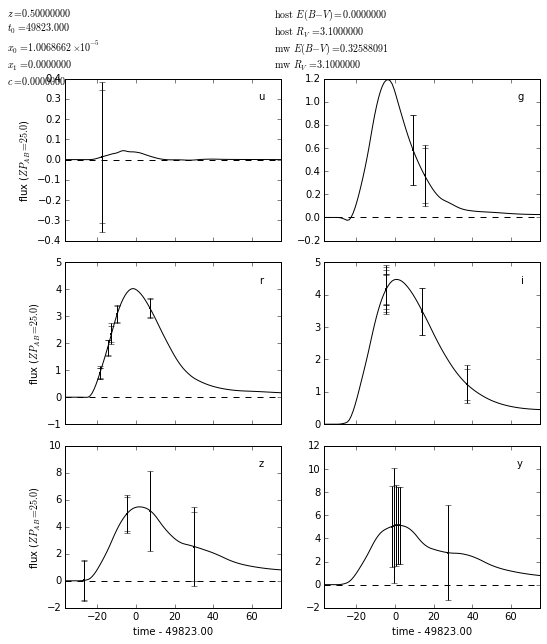

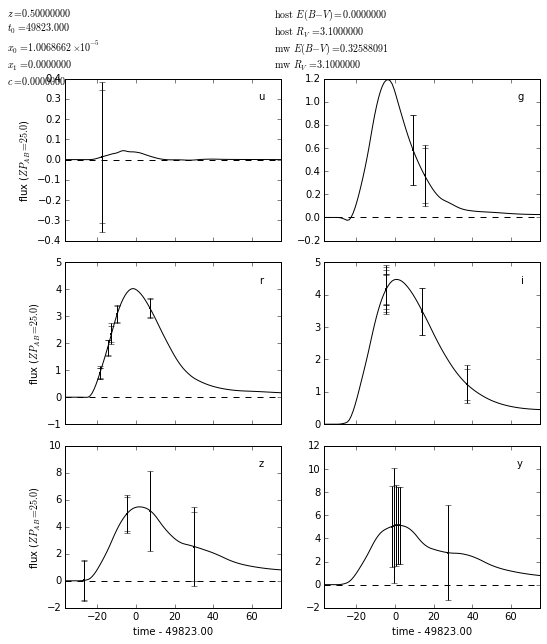

In [164]:
qm_309_498.lcplot()

In [181]:
print qm_309_498.SN.equivalentSNCosmoModel()

source:
  class      : SALT2Source
  name       : 'salt2-extended'
  version    : 1.0
  phases     : [-20, .., 50] days
  wavelengths: [300, .., 18000] Angstroms
effect (name='host' frame='rest'):
  class           : OD94Dust
  wavelength range: [909.09, 33333.3] Angstroms
effect (name='mw' frame='obs'):
  class           : OD94Dust
  wavelength range: [909.09, 33333.3] Angstroms
parameters:
  z       = 0.5
  t0      = 49823.0
  x0      = 1.0068661711630977e-05
  x1      = 0.0
  c       = 0.0
  hostebv = 0.0
  hostr_v = 3.1000000000000001
  mwebv   = 0.32588091492652893
  mwr_v   = 3.1000000000000001


In [182]:
print out_309_498.sncosmoModel

source:
  class      : SALT2Source
  name       : 'salt2-extended'
  version    : 1.0
  phases     : [-20, .., 50] days
  wavelengths: [300, .., 18000] Angstroms
effect (name='host' frame='rest'):
  class           : OD94Dust
  wavelength range: [909.09, 33333.3] Angstroms
effect (name='mw' frame='obs'):
  class           : OD94Dust
  wavelength range: [909.09, 33333.3] Angstroms
parameters:
  z       = 0.5
  t0      = 49823.631863224953
  x0      = 4.6309307337106839e-06
  x1      = 0.71931976702786637
  c       = 0.23883403032414693
  hostebv = 0.0
  hostr_v = 3.1000000000000001
  mwebv   = 0.0076600932516157627
  mwr_v   = 3.1000000000000001


In [186]:
sncosmo.chisq(qm_309_498.SNCosmoLC(), model=qm_309_498.SN.equivalentSNCosmoModel())

40


5.9372102542946931e-13

In [191]:
sncosmo.chisq(qm_309_498.SNCosmoLC(), model=out_309_498.sncosmoModel)

40


0.48621729475023001

In [190]:
print qm_309_498.sncosmoModel

source:
  class      : SALT2Source
  name       : 'salt2-extended'
  version    : 1.0
  phases     : [-20, .., 50] days
  wavelengths: [300, .., 18000] Angstroms
effect (name='host' frame='rest'):
  class           : OD94Dust
  wavelength range: [909.09, 33333.3] Angstroms
effect (name='mw' frame='obs'):
  class           : OD94Dust
  wavelength range: [909.09, 33333.3] Angstroms
parameters:
  z       = 0.5
  t0      = 49823.0
  x0      = 1.0068661711630977e-05
  x1      = 0.0
  c       = 0.0
  hostebv = 0.0
  hostr_v = 3.1000000000000001
  mwebv   = 0.32588091492652893
  mwr_v   = 3.1000000000000001


40


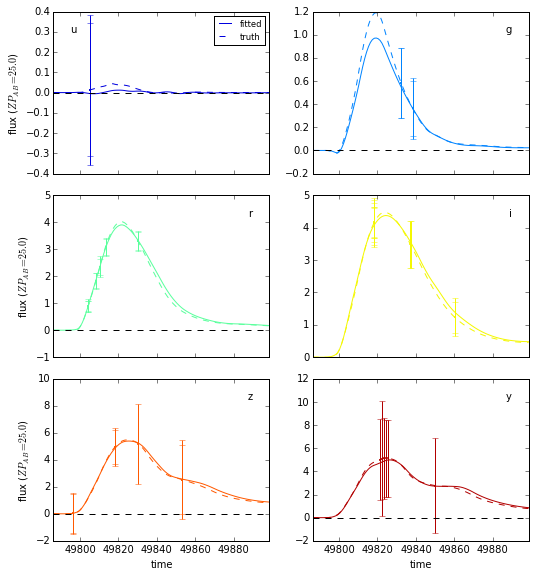

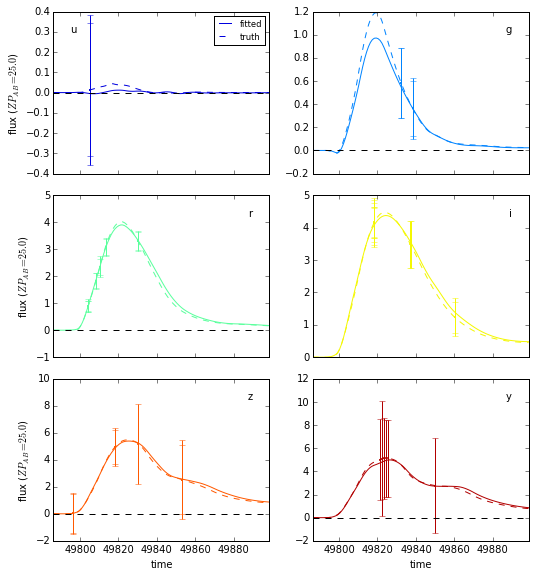

In [176]:
sncosmo.plot_lc( qm_309_498.SNCosmoLC(), model=[out_309_498.sncosmoModel, 
                                                qm_309_498.SN.equivalentSNCosmoModel()],
               model_label=['fitted', 'truth'])

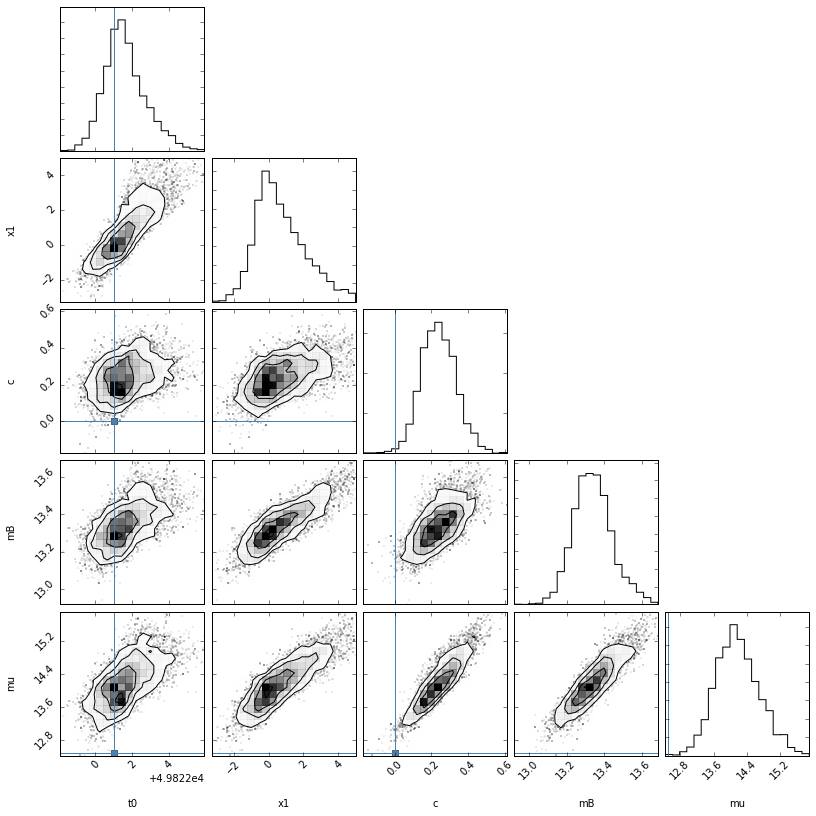

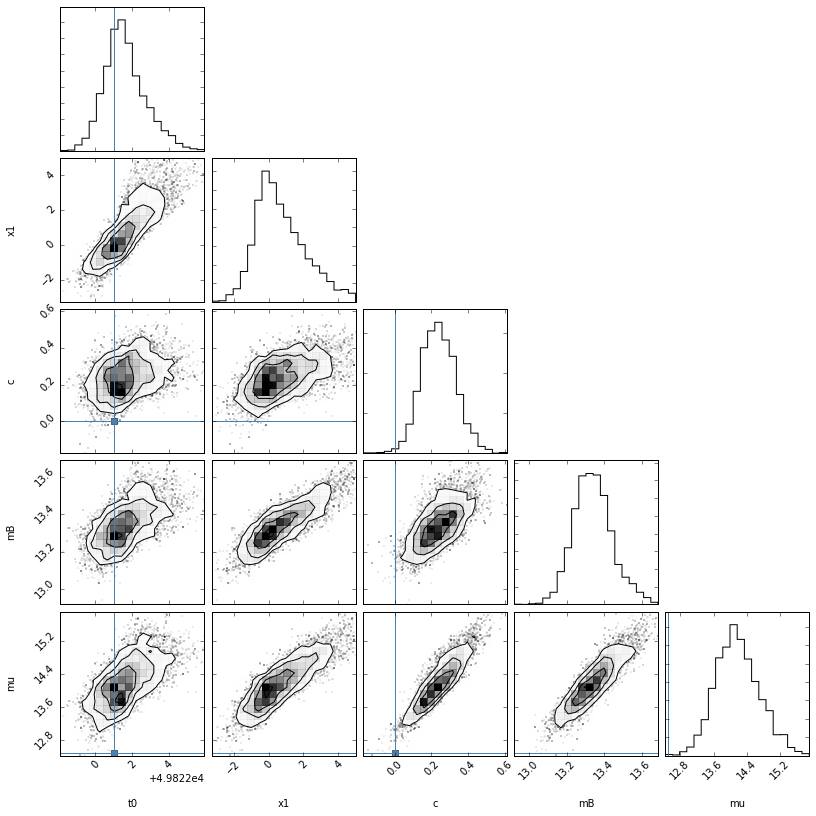

In [163]:
corner(out_309_498.salt_samples(), labels=out_309_498.salt_samples().columns, truths=[49823, 12.5, 0, 0., 12.5])

In [80]:
qm_744 = PerSNMetric(t0=49923, fieldID=744, summarydf=summarydf,  efficiency=et, lsst_bp=lsst_bp)

In [82]:
qm_744.qualityMetric()

1103


6.9425772972855881

In [139]:
mBT = -2.5 * np.log10(qm_744.SN.SNstate['x0'])
muT = mBT 

In [88]:
import analyzeSN as ans
from corner import corner

In [126]:
mcmc_out_744_F = sncosmo.mcmc_lc(qm_744.SNCosmoLC(nightlyCoadd=True), model=qm_744.sncosmoModel, 
                vparam_names=['t0', 'x0', 'x1', 'c'], 
                bounds={'c':(-1., 1.), 'x1':(-5.0, 5.0)}, 
                minsnr=0., modelcov=False)

In [127]:
tt = ans.ResChar.fromSNCosmoRes(mcmc_out_744_F)

In [129]:
tt.salt_samples().mu.var()/ out_744.salt_samples().mu.var()

0.079423266331676873

In [90]:
mcmc_out = sncosmo.mcmc_lc(qm_744.SNCosmoLC(nightlyCoadd=True), model=qm_744.sncosmoModel, 
                vparam_names=['t0', 'x0', 'x1', 'c'], 
                bounds={'c':(-1., 1.), 'x1':(-5.0, 5.0)}, 
                minsnr=0., modelcov=True)

In [120]:
mcmc_out_309 = sncosmo.mcmc_lc(qm_309.SNCosmoLC(nightlyCoadd=True), model=qm_744.sncosmoModel, 
                vparam_names=['t0', 'x0', 'x1', 'c'], 
                bounds={'c':(-1., 1.), 'x1':(-5.0, 5.0)}, 
                minsnr=0., modelcov=True)

In [130]:
mcmc_out_309_F = sncosmo.mcmc_lc(qm_309.SNCosmoLC(nightlyCoadd=True), model=qm_744.sncosmoModel, 
                vparam_names=['t0', 'x0', 'x1', 'c'], 
                bounds={'c':(-1., 1.), 'x1':(-5.0, 5.0)}, 
                minsnr=0., modelcov=False)

In [131]:
out_309_F = ans.ResChar.fromSNCosmoRes(mcmc_out_309_F)

In [91]:
out_744 = ans.ResChar.fromSNCosmoRes(mcmc_out)

In [122]:
out_309 = ans.ResChar.fromSNCosmoRes(mcmc_out_309)

In [132]:
out_309.salt_samples().mu.var() / out_309_F.salt_samples().mu.var()

0.48597328040162396

In [124]:
0.05 * 0.05 / out_309.salt_samples().mu.var()

0.0019439683860306919

In [125]:
0.05 * 0.05 / out_309.mu_variance_linear()

          mB        x1         c
mB  0.034989  0.425184  0.024423
x1  0.425184  7.450886  0.427205
c   0.024423  0.427205  0.047480 [ 1.    0.14 -3.1 ]


0.010678019000784269

20


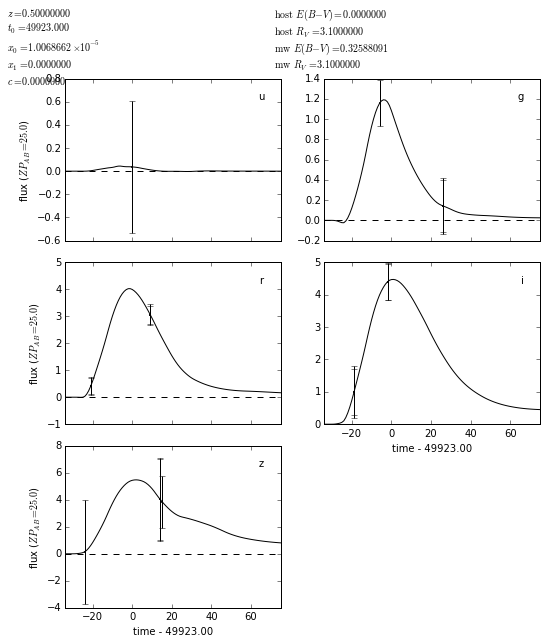

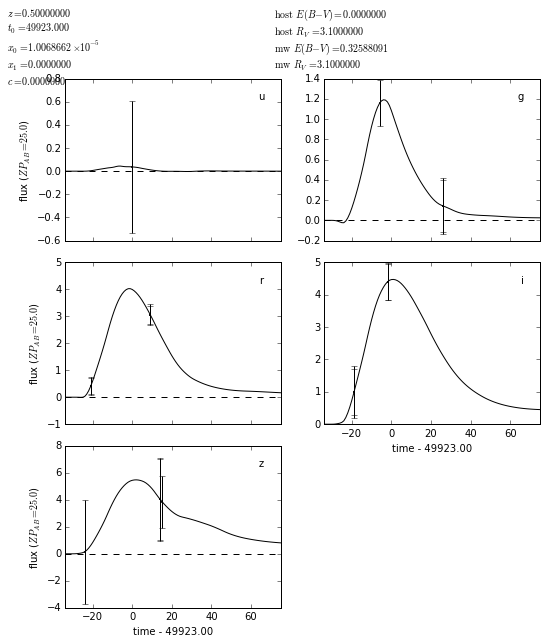

In [142]:
qm_309.lcplot(scattered=False)

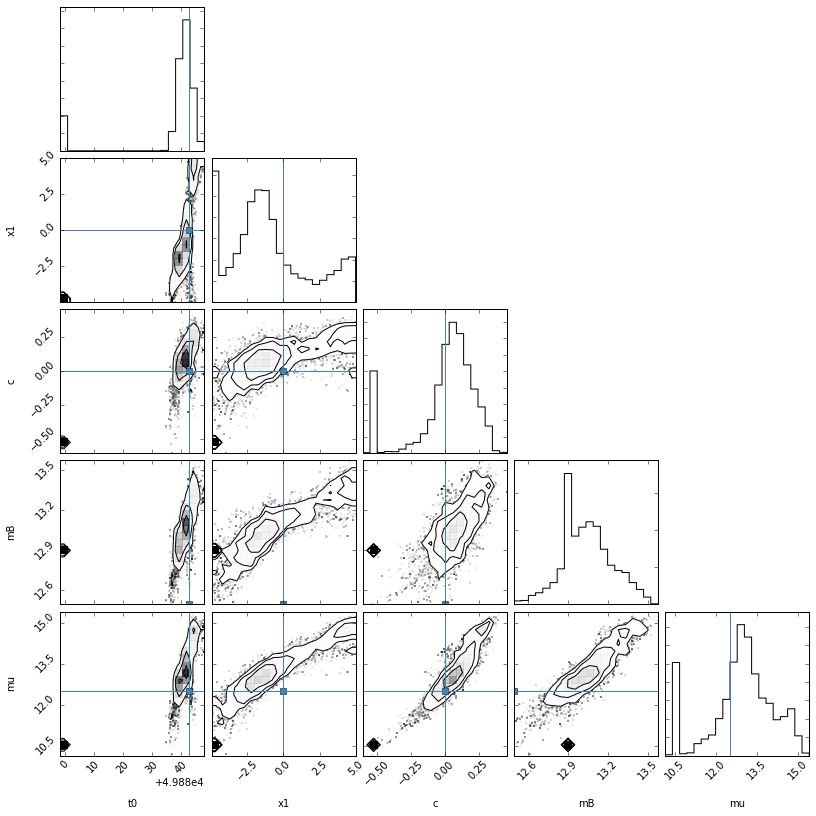

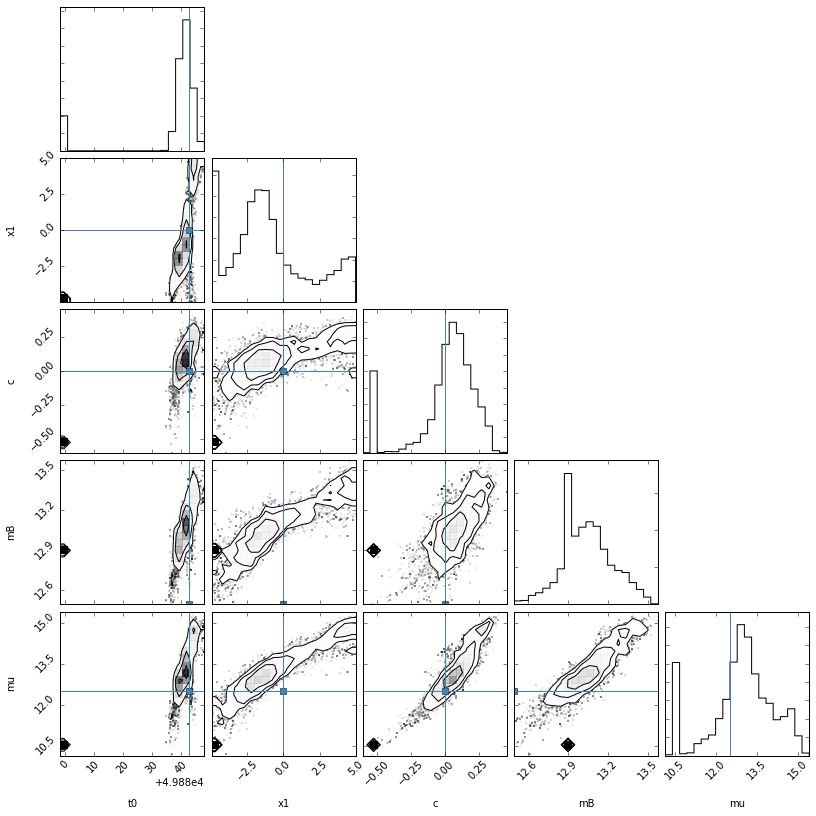

In [143]:
corner(out_309.salt_samples(), labels=out_309.salt_samples().columns, truths=[49923, 
                                                                              0., 0. , mBT, muT  ])

/usr/local/manual/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


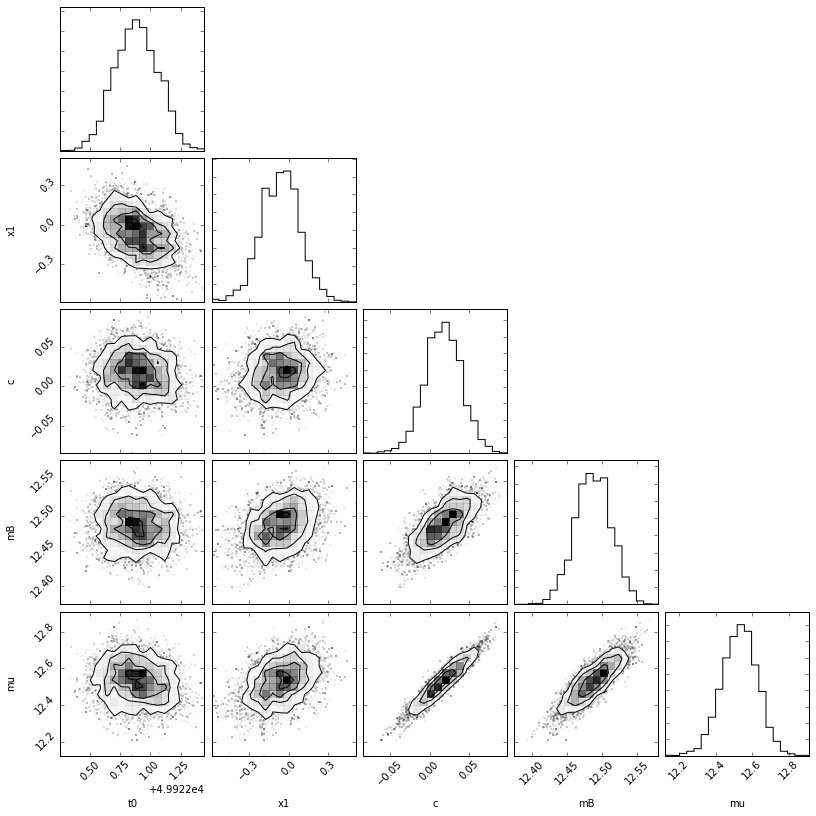

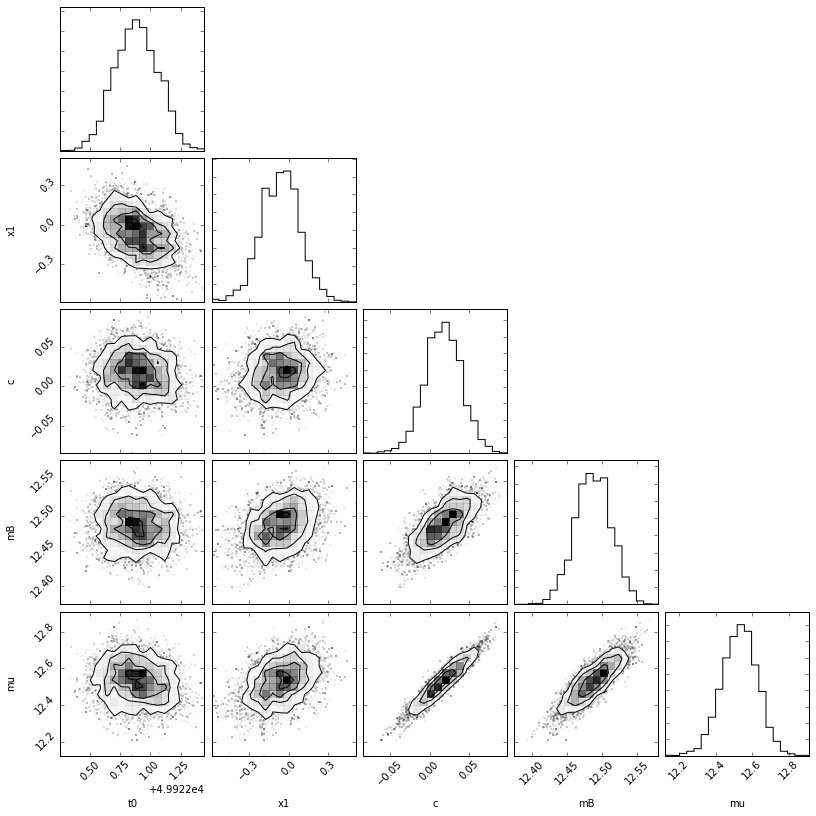

In [94]:
corner(out_744.salt_samples(), labels=out_744.salt_samples().columns)

In [115]:
0.05**2 / out_744.salt_samples(alpha=0.11, beta=3.1).mu.var() 

0.73100819292709907

In [119]:
0.05**2 / out_fit_309.salt_samples(alpha=0.11, beta=3.1).mu.var() 

AttributeError: 'tuple' object has no attribute 'salt_samples'

In [113]:
out_fit_744 = sncosmo.fit_lc(qm_744.SNCosmoLC(nightlyCoadd=True), model=qm_744.sncosmoModel, 
               vparam_names=['x0', 'x1','c'], minsnr=0.,)

In [117]:
out_fit_744 = sncosmo.fit_lc(qm_744.SNCosmoLC(nightlyCoadd=True), model=qm_744.sncosmoModel, 
               vparam_names=['x0', 'x1','c'], minsnr=0.,)

In [114]:
ans.ResChar.fromSNCosmoRes(out_fit_744)

UnboundLocalError: local variable 'weights' referenced before assignment

In [105]:
qm_744.discoveryMetric()

1103


1.0

In [78]:
qm_309 = PerSNMetric(t0=49923, fieldID=309, summarydf=summarydf, efficiency=et, lsst_bp=lsst_bp)

In [79]:
qm_309.discoveryMetric()

metrics.py:159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['SNR'] = df['flux'] / df['fluxerr']
metrics.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['DetectionEfficiency'] = df.apply(self.func, axis=1)


20


metrics.py:162: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df.sort_values('SNR', ascending=False, inplace=True)


0.99999331820547932

In [84]:
qm_309.qualityMetric()

20


0.053720543713400112

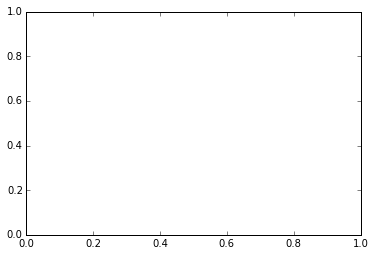

In [51]:
loc, ax_loc =plt.subplots()

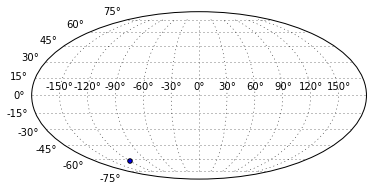

In [57]:
xx = oss.SummaryOpsim(summarydf.query('fieldID==309'))
loc_fig = xx.showFields()

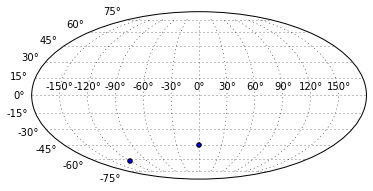

In [58]:
yy = oss.SummaryOpsim(summarydf.query('fieldID==744'))
yy.showFields(ax=loc_fig.axes[0])

In [60]:
loc_fig.savefig('loc_309_744.pdf')

In [37]:
mat[mat.fillna(0.).sum(axis=1) > 0].index.max() - mat[mat.fillna(0.).sum(axis=1) > 0].index.min()

215.0

In [24]:
len(_)

5

/usr/local/manual/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


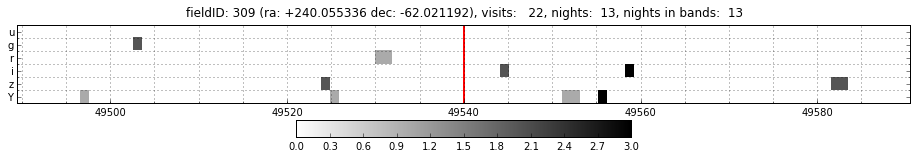

In [16]:
_ = so.cadence_plot(fieldID=309, mjd_center=49540)

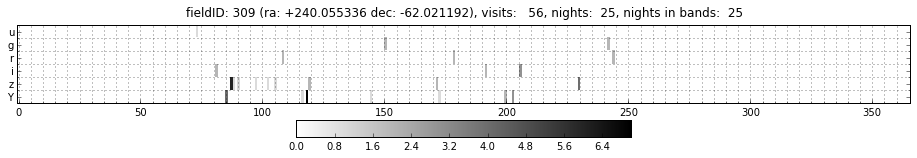

In [17]:
# 1st season by default
_ = so.cadence_plot(fieldID=309)

## Metrics

In [61]:
qm = PerSNMetric(fieldID=309, t0=49540, summarydf=summarydf, lsst_bp=lsst_bp)

metrics.py:99: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  lc['modelFlux'] = lc['flux']
metrics.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  lc['deviation'] = np.random.normal(size=len(lc['flux']))


19


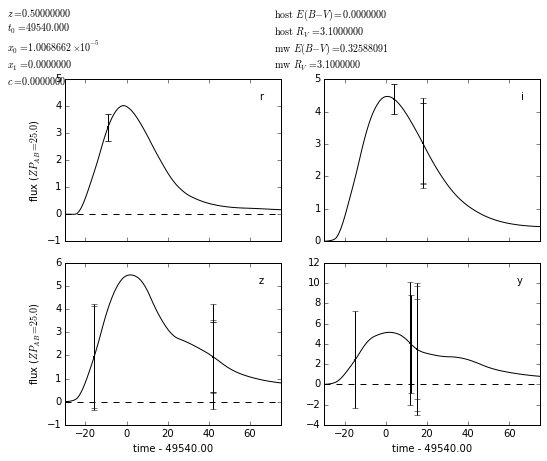

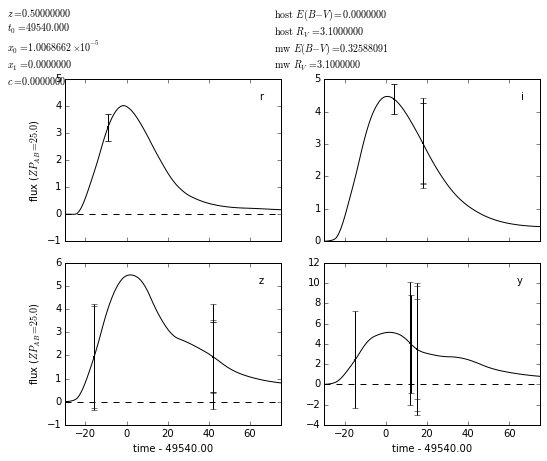

In [62]:
qm.lcplot()

19


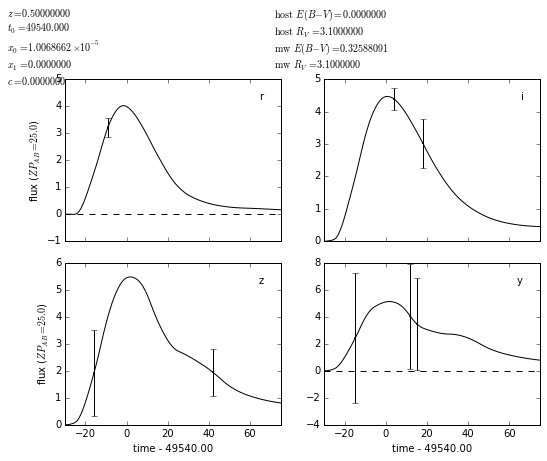

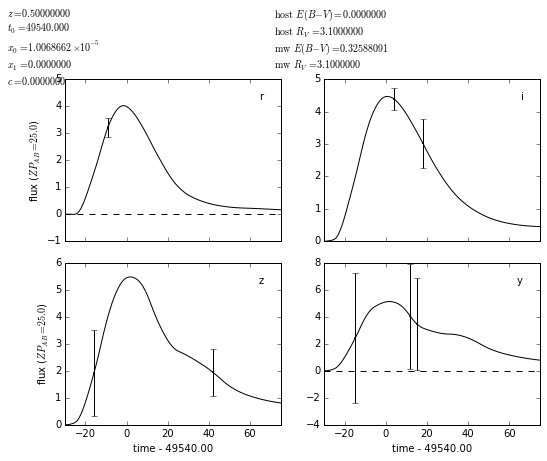

In [63]:
qm.lcplot(nightlyCoadd=True)

In [21]:
qm.writeLightCurve('coadded_lc.dat',nightlyCoadd=True)

In [22]:
cm = qm.cadence_Matrix(fieldID=309, mjd_center=49540, mjd_range=[-30., 50.])

In [23]:
cm.head()

Filters,u,g,r,i,z,Y
49510,NaN,NaN,NaN,NaN,NaN,NaN
49511,NaN,NaN,NaN,NaN,NaN,NaN
49512,NaN,NaN,NaN,NaN,NaN,NaN
49513,NaN,NaN,NaN,NaN,NaN,NaN
49514,NaN,NaN,NaN,NaN,NaN,NaN


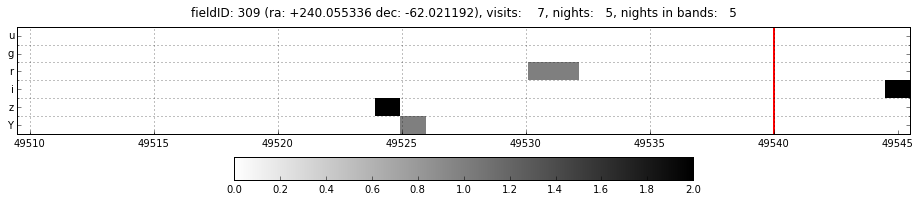

In [24]:
cm = qm.cadence_plot(fieldID=309, mjd_center=49540, mjd_range=[-30, 5])

In [25]:
qm = PerSNMetric(fieldID=309, t0=49540, summarydf=ss, lsst_bp=lsst_bp, efficiency=et)

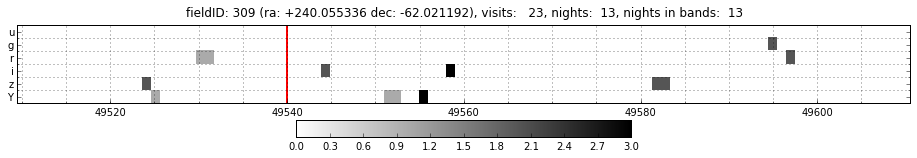

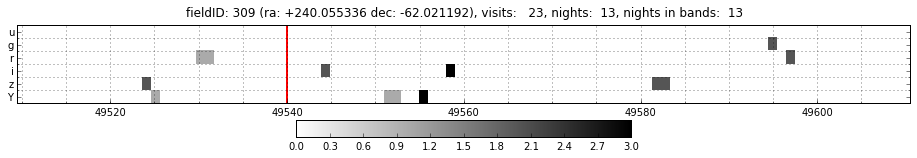

In [26]:
qm.SNCadence[0]

In [27]:
qm.summary.head()

,obsHistID,sessionID,propID,fieldID,fieldRA,fieldDec,filter,expDate,expMJD,night,...,humidity,slewDist,slewTime,fiveSigmaDepth,ditheredRA,ditheredDec,gamma,N0sq,alpha,MJDay
54984,54932,1189,364,309,4.189756,-1.082474,u,6337289,49426.348262,73,...,0,0.054175,4.737670,23.535869,4.165341,-1.089087,0.039553,0.000001,0.039553,49426
62174,62118,1189,364,309,4.189756,-1.082474,i,7018234,49434.229565,81,...,0,0.054641,4.659288,23.346593,4.230447,-1.089087,0.039780,0.000001,0.039780,49434
62201,62145,1189,364,309,4.189756,-1.082474,i,7019269,49434.241549,81,...,0,0.054641,4.600334,23.504851,4.230447,-1.089087,0.039745,0.000001,0.039745,49434
65712,65656,1189,364,309,4.189756,-1.082474,Y,7364902,49438.241925,85,...,0,0.054641,4.534727,21.193041,4.136860,-1.085780,0.039916,0.000002,0.039916,49438
65717,65661,1189,364,309,4.189756,-1.082474,Y,7365094,49438.244152,85,...,0,0.088075,5.189096,21.203663,4.136860,-1.085780,0.039915,0.000002,0.039915,49438


In [28]:
qm.discoveryMetric()

0.99995137946174906

In [29]:
qm.qualityMetric()

0.0029671277166204053

###  Using a Pull Light curve from MAF

In [30]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles

In [31]:
outDir ='LightCurve'
dbFile = 'enigma_1189_sqlite.db'
opsimdb = utils.connectOpsimDb(dbFile)
resultsDb = db.ResultsDb(outDir=outDir)

In [32]:
filters = ['u','g','r','i','z','y']
colors={'u':'cyan','g':'g','r':'y','i':'r','z':'m', 'y':'k'}


In [33]:
# Set RA, Dec for a single point in the sky. in radians.
ra = np.radians(0.)
dec = np.radians(0.)
# SNR limit (Don't use points below this limit)
snrLimit = 5.
# Demand this many points above SNR limit before plotting LC
nPtsLimit = 6

In [34]:
# The pass metric just passes data straight through.
metric = metrics.PassMetric(cols=['filter','fieldID','finSeeing','fiveSigmaDepth',
                                  'expMJD','airmass', 'propID', 'night', 'filtSkyBrightness'])
slicer = slicers.UserPointsSlicer(ra,dec,lonCol='fieldRA',latCol='fieldDec')
sql = 'night < 366'
bundle = metricBundles.MetricBundle(metric,slicer,sql)
bg =  metricBundles.MetricBundleGroup({0:bundle}, opsimdb,
                                      outDir=outDir, resultsDb=resultsDb)

In [35]:
bg.runAll()

Querying database with constraint night < 366
Found 272657 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


In [36]:
llc = pd.DataFrame.from_records(bundle.metricValues.data[0])

In [37]:
llc.head()

,obsHistID,filtSkyBrightness,airmass,fieldRA,fieldDec,filter,fiveSigmaDepth,expMJD,night,finSeeing,propID,fieldID
0,239966,17.153304,1.168194,6.25556,0.003271,z,22.149947,49672.064912,319,0.772224,364,2655
1,149400,21.874528,1.153041,6.25556,0.003271,g,24.854518,49545.387207,192,0.782242,364,2655
2,227675,17.617678,1.209316,6.25556,0.003271,z,22.658431,49646.061726,293,0.597362,364,2655
3,148176,20.009584,1.293457,6.25556,0.003271,i,23.866753,49544.314227,191,0.758747,364,2655
4,178722,19.972167,1.355178,6.25556,0.003271,i,23.843180,49577.210972,224,0.759127,364,2655


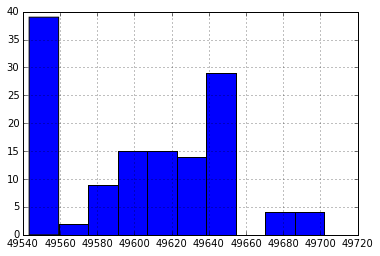

In [38]:
llc.expMJD.hist()

In [39]:
q2 = PerSNMetric(t0=49580, summarydf=llc, lsst_bp=lsst_bp, efficiency=et, raCol='fieldRA',
                decCol='fieldDec')

In [40]:
ss.columns

Index([u'obsHistID', u'sessionID', u'propID', u'fieldID', u'fieldRA', u'fieldDec', u'filter', u'expDate', u'expMJD', u'night', u'visitTime', u'visitExpTime', u'finRank', u'finSeeing', u'transparency', u'airmass', u'vSkyBright', u'filtSkyBrightness', u'rotSkyPos', u'lst', u'altitude', u'azimuth', u'dist2Moon', u'solarElong', u'moonRA', u'moonDec', u'moonAlt', u'moonAZ', u'moonPhase', u'sunAlt', u'sunAz', u'phaseAngle', u'rScatter', u'mieScatter', u'moonIllum', u'moonBright', u'darkBright', u'rawSeeing', u'wind', u'humidity', u'slewDist', u'slewTime', u'fiveSigmaDepth', u'ditheredRA', u'ditheredDec', u'gamma', u'N0sq', u'alpha', u'MJDay'], dtype='object')

In [41]:
llc.columns

Index([u'obsHistID', u'filtSkyBrightness', u'airmass', u'fieldRA', u'fieldDec', u'filter', u'fiveSigmaDepth', u'expMJD', u'night', u'finSeeing', u'propID', u'fieldID'], dtype='object')

In [42]:
q2.raCol

'fieldRA'

In [43]:
q2.summary[q2.raCol].iloc[0]

6.25556

In [44]:
q2.radeg

358.41718649085726

In [45]:
q2.decdeg

0.18741449478729227

In [46]:
q2.SN.SNstate

{'MWE(B-V)': 0.035068757832050323,
 'ModelSource': 'salt2-extended',
 '_dec': 0.003271,
 '_ra': 6.25556,
 'c': 0.0,
 'hostebv': 0.0,
 'hostr_v': 3.1000000000000001,
 'mwebv': 0.0,
 'mwr_v': 3.1000000000000001,
 't0': 49580.0,
 'x0': 1.0068661711630977e-05,
 'x1': 0.0,
 'z': 0.5}

metrics.py:148: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['SNR'] = df['flux'] / df['fluxerr']
metrics.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['DetectionEfficiency'] = df.apply(self.func, axis=1)
/usr/local/manual/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:2891: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  inplace=inplace, 

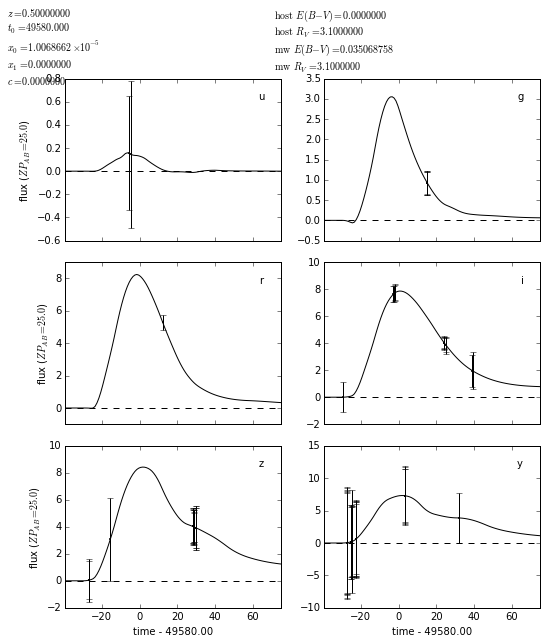

In [47]:
q2.lcplot(nightlyCoadd=False)

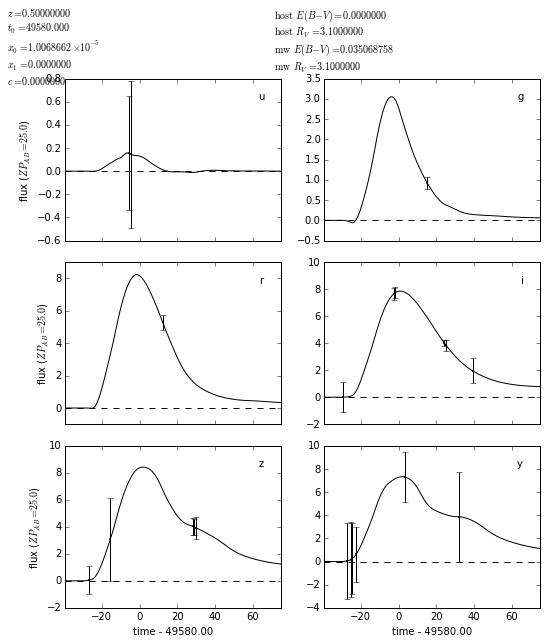

In [48]:
q2.lcplot(nightlyCoadd=True)

In [49]:
q2.writeLightCurve(fname='test.dat', nightlyCoadd=True)

In [50]:
!cat test.dat

night band zpsys flux zp fluxerr time
197 i ab 7.38981535465e-15 0.0 1.12061110296e-10 49550.294916
199 y ab 4.16334214811e-12 0.0 3.3196763789e-10 49552.2878882
200 z ab 5.38047609363e-12 0.0 1.05603667637e-10 49553.3395135
201 y ab 1.57584572158e-11 0.0 3.22634345035e-10 49554.3756353
202 y ab 2.39528163608e-11 0.0 3.07289518501e-10 49555.277983
204 y ab 6.15882336785e-11 0.0 2.34661082246e-10 49557.3534095
211 z ab 3.06088533052e-10 0.0 3.06937163341e-10 49564.433548
221 u ab 1.56029563392e-11 0.0 4.89707769799e-11 49574.326309
222 u ab 1.46938990797e-11 0.0 6.34592850528e-11 49575.26335
224 i ab 7.64088967051e-10 0.0 4.26806497321e-11 49577.203024
225 i ab 7.75634346472e-10 0.0 4.24992888433e-11 49578.2069525
230 y ab 7.2989146669e-10 0.0 2.15075882766e-10 49583.194115
239 r ab 5.28844207371e-10 0.0 4.80448638946e-11 49592.277693
242 g ab 9.20280911049e-11 0.0 1.43309236615e-11 49595.173483
251 i ab 4.01952469103e-10 0.0 2.26067447291e-11 49604.187105
252 i ab 3.84096121974e-10 0.0

In [51]:
q2.coaddedLightCurve.reset_index()[q2.coaddedLightCurve.reset_index()['band'] == 'y']

,night,band,zpsys,flux,zp,fluxerr,time
1,199,y,ab,4.163342e-12,0,3.319676e-10,49552.287888
3,201,y,ab,1.575846e-11,0,3.226343e-10,49554.375635
4,202,y,ab,2.395282e-11,0,3.072895e-10,49555.277983
5,204,y,ab,6.158823e-11,0,2.346611e-10,49557.353409
11,230,y,ab,7.298915e-10,0,2.150759e-10,49583.194115
19,259,y,ab,3.864912e-10,0,3.912969e-10,49612.188252


In [52]:
q2.qualityMetric()

0.086475461159803382

In [53]:
q2.discoveryMetric()

0.99999999999999989

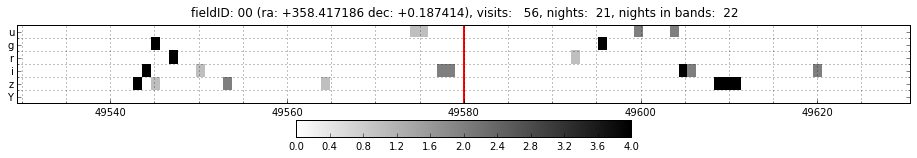

In [54]:
_ = q2.cadence_plot(summarydf=llc, racol='fieldRA', deccol='fieldDec', mjd_center=49580)

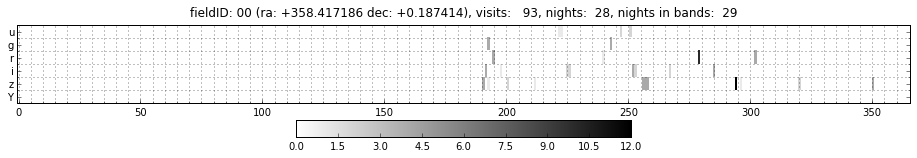

In [55]:
# Defaults to full season
_ = q2.cadence_plot(summarydf=llc, racol='fieldRA', deccol='fieldDec')

## Demonstrate that a minimal definition of observation works

In [56]:
xx = llc[['expMJD', 'filter', 'fiveSigmaDepth', 'fieldRA', 'fieldDec', 'fieldID']].copy(deep=True)

In [57]:
xx

,expMJD,filter,fiveSigmaDepth,fieldRA,fieldDec,fieldID
0,49672.064912,z,22.149947,6.255560,0.003271,2655
1,49545.387207,g,24.854518,6.255560,0.003271,2655
2,49646.061726,z,22.658431,6.255560,0.003271,2655
3,49544.314227,i,23.866753,6.255560,0.003271,2655
4,49577.210972,i,23.843180,6.255560,0.003271,2655
5,49554.373247,y,21.369012,6.255560,0.003271,2655
6,49672.081557,z,21.995196,6.255560,0.003271,2655
7,49543.439675,z,22.287935,6.255560,0.003271,2655
8,49547.355973,r,24.536172,6.255560,0.003271,2655
9,49631.109299,r,24.739914,6.255560,0.003271,2655


In [58]:
q3 = PerSNMetric(t0=49580, summarydf=xx, lsst_bp=lsst_bp, efficiency=et, raCol='fieldRA',
                 decCol='fieldDec')

In [59]:
q3.lightcurve

,time,band,flux,fluxerr,zp,zpsys,SNR,fiveSigmaDepth,DetectionEfficiency
84,49578.196701,i,7.755384e-10,5.639221e-11,0,ab,13.752580,23.891976,0.982020548524
4,49577.210972,i,7.641964e-10,5.886288e-11,0,ab,12.982654,23.843180,0.970846927353
40,49577.195076,i,7.639816e-10,6.182001e-11,0,ab,12.358161,23.788072,0.980670206794
128,49578.217204,i,7.757303e-10,6.359777e-11,0,ab,12.197445,23.756624,0.980863066305
79,49592.277693,r,5.288442e-10,4.804486e-11,0,ab,11.007300,24.058825,0.977440877322
115,49604.177906,i,4.021245e-10,4.009737e-11,0,ab,10.028698,24.258893,0.971468221461
57,49604.209600,i,4.015318e-10,4.339009e-11,0,ab,9.253998,24.170085,0.960060775297
34,49604.195079,i,4.018032e-10,4.392809e-11,0,ab,9.146840,24.156292,0.958431972159
100,49604.165835,i,4.023504e-10,5.250583e-11,0,ab,7.662966,23.957700,0.91928675239
48,49605.172561,i,3.838602e-10,5.207630e-11,0,ab,7.371111,23.966039,0.898446610558


In [60]:
q3.SNCosmoLC()

index,time,band,flux,fluxerr,zp,zpsys,SNR,fiveSigmaDepth,DetectionEfficiency
84,49578.196701,i,7.75538365405e-10,5.63922106496e-11,0.0,ab,13.7525795934,23.891976,0.982020548524
4,49577.210972,i,7.64196356584e-10,5.88628779774e-11,0.0,ab,12.9826536323,23.84318,0.970846927353
40,49577.195076,i,7.63981577519e-10,6.18200051961e-11,0.0,ab,12.3581610046,23.788072,0.980670206794
128,49578.217204,i,7.7573032754e-10,6.35977734421e-11,0.0,ab,12.1974447462,23.756624,0.980863066305
79,49592.277693,r,5.28844207371e-10,4.80448638946e-11,0.0,ab,11.0072995218,24.058825,0.977440877322
115,49604.177906,i,4.02124455277e-10,4.00973738694e-11,0.0,ab,10.0286980536,24.258893,0.971468221461
57,49604.2096,i,4.01531809615e-10,4.33900886246e-11,0.0,ab,9.25399837481,24.170085,0.960060775297
34,49604.195079,i,4.0180324533e-10,4.39280924679e-11,0.0,ab,9.14684027364,24.156292,0.958431972159
100,49604.165835,i,4.02350366191e-10,5.25058284955e-11,0.0,ab,7.66296576437,23.9577,0.91928675239
48,49605.172561,i,3.83860199365e-10,5.20763040109e-11,0.0,ab,7.37111065495,23.966039,0.898446610558


In [61]:
q3.SN.SNstate

{'MWE(B-V)': 0.035068757832050323,
 'ModelSource': 'salt2-extended',
 '_dec': 0.003271,
 '_ra': 6.25556,
 'c': 0.0,
 'hostebv': 0.0,
 'hostr_v': 3.1000000000000001,
 'mwebv': 0.0,
 'mwr_v': 3.1000000000000001,
 't0': 49580.0,
 'x0': 1.0068661711630977e-05,
 'x1': 0.0,
 'z': 0.5}

In [62]:
q3.qualityMetric()

0.086475461159803382

In [63]:
q3.discoveryMetric()

0.99999999999999989